In [123]:
import re
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
from io import BytesIO
import datetime
import random
import wikipedia


stopwords = set(STOPWORDS)



def getcorpus_wiki(Title):
    soup = BeautifulSoup(wikipedia.WikipediaPage(title = Title).content, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words


def nebulize(text, imgloc, imgurl,maxsize ,
               maxwords, save, title, color, font, 
              figsize, fontsize):
    if imgloc == "local":
        mask = np.array(Image.open(imgurl))
    else:
        response1 = requests.get(imgurl)
        img = Image.open(BytesIO(response1.content))
        mask = np.array(img)
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\\' +str(font)+'.ttf', stopwords = stopwords, background_color="white", max_words=maxwords,max_font_size=maxsize,  mask=mask, collocation_threshold=150).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[figsize,figsize])
    plt.title(title, size=fontsize)
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    
    plt.show()


In [25]:
def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(87, 154), random.randint(0, 100) ,random.randint(0, 92))


def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 92))


def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 6), random.randint(0, 100) ,random.randint(0, 92))




def orange_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(14, 38), random.randint(0, 100) ,random.randint(0, 92))




def yellow_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(39, 69), random.randint(0, 100) ,random.randint(0, 92))


def teal_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(147, 180), random.randint(0, 100) ,random.randint(0, 92))


def lightblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(180, 200), random.randint(0, 100) ,random.randint(0, 92))


def darkblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(208, 250), random.randint(0, 100) ,random.randint(0, 92))




def purple_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(256, 283), random.randint(0, 100) ,random.randint(0, 92))


def pink_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(293, 341), random.randint(0, 100) ,random.randint(0, 92))



In [3]:
br = getcorpus_wiki('Blade Runner')

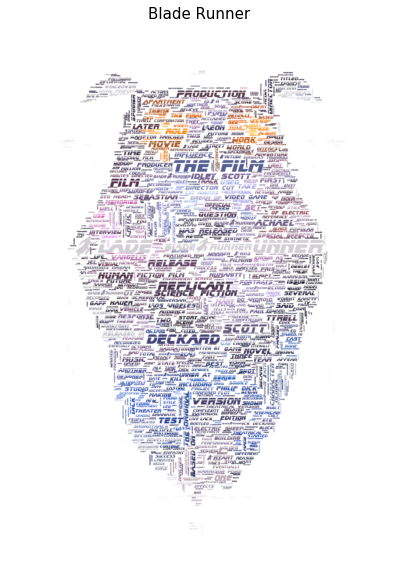

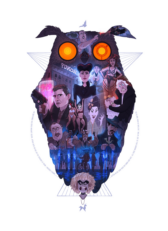

In [49]:
nebulize(br, "url", 
            "https://cdna.artstation.com/p/assets/images/images/013/249/636/large/paul-tinker-bladerunner.jpg?1538740659",
           500, 7000, "yes", "Blade Runner", "image", "BLADRMF", 10, 15 )

In [8]:
blade = getcorpus_url("https://www.dailyscript.com/scripts/blade-runner_shooting.html")
blade

" Blade Runner script by Hampton Fancher   David Peoples                                 BLADE RUNNER                                Screenplay by                               HAMPTON FANCHER                                     and                                DAVID PEOPLES         February            NOTE  THE HARD COPY OF THIS SCRIPT CONTAINED SCENE NUMBERS         AND SOME  SCENE OMITTED  SLUGS  THEY HAVE BEEN REMOVED FOR         THIS SOFT COPY         android  an'droid  adj   Possessing human features   n                 A synthetic man created from biological materials                 Also called humanoid    Late Greek androeides                 manlike   ANDR O    OID                                         THE AMERICAN HERITAGE                                         DICTIONARY OF THE ENGLISH                                         LANGUAGE           android  an'droid  n  Gk  humanoid automation  more at                 robot    early version utilized for work too            

In [ ]:
blade = remove_tuples(blade)

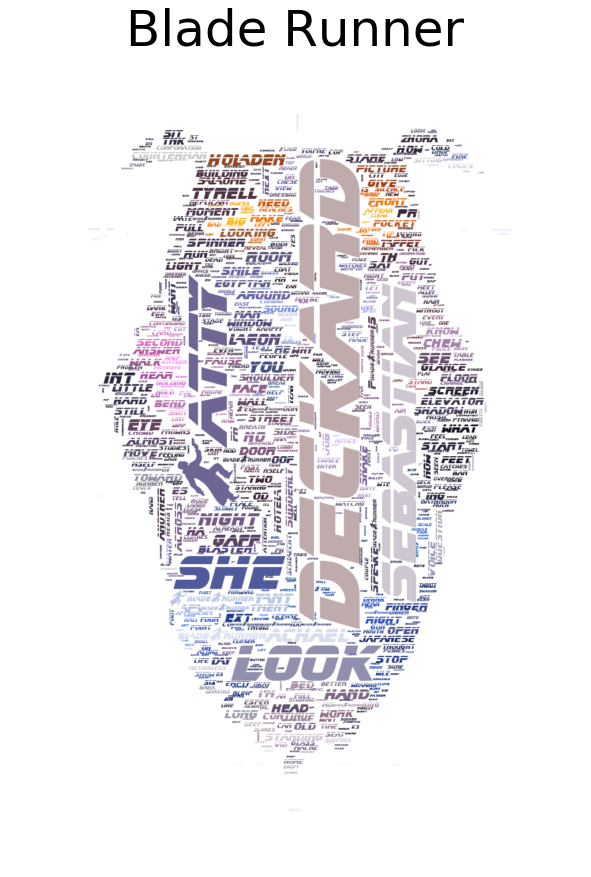

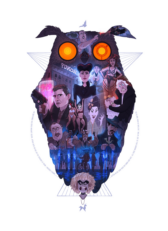

In [124]:


nebulize(blade, "url", 
            "https://cdna.artstation.com/p/assets/images/images/013/249/636/large/paul-tinker-bladerunner.jpg?1538740659",
           150, 7000, "yes", "Blade Runner", "image", "BLADRMF", 15, 50 )

In [139]:


def remove_tuples(df):
    df=df.replace('CUT TO', '')
    df=df.replace(' He ', '')
    df=df.replace('TO INT', '')
    df=df.replace(' go ', '')
    df=df.replace(' turn', '')
    df=df.replace(' goes', '')
    df=df.replace(' is ', '')
    df=df.replace(' hi ', '')
    df=df.replace(' what ', '')
    df=df.replace(' one ', '')
    df=df.replace(' take ', '')
    df=df.replace(' come ', '')
    df=df.replace(' way ', '')
    df=df.replace(' you ', '')
    df=df.replace(' TO EXT ', '')
    df=df.replace(' back ', '')
    df=df.replace(' tng ', '')
    df=df.replace(' wch ', '')
    df=df.replace('EXT  SPACE', '')
    df=df.replace(' THE DEATH ', '')
    df=df.replace(' INT ', '')
    df=df.replace(' toward the ', '')
    df=df.replace(' look ', '')
    df=df.replace(' robot ', '')
    df=df.replace(' going to ', '')
    df=df.replace(' pirateship ', '')
    df=df.replace(' the rebel ', '')
    df=df.replace(' wing ', '')
    df=df.replace(' fighter ', '')
    df=df.replace(' begins to ', '')
    df=df.replace(' his head ', '')
    df=df.replace(' turn ', '')
    df=df.replace(' luke look ', '')
    df=df.replace(' move ', '')
    df=df.replace(' the Death star ', ' death star ')

    return df


In [130]:
stopwords.add('us')
stopwords.add('let')
stopwords.add('one')

stopwords.add('now')
stopwords.add('away')
stopwords.add('stop')
stopwords.add('the')

In [155]:
def Cap(wordlist, df):
    for word in wordlist:
        df= df.replace(word, word.capitalize()) 
        return df

In [140]:
ANH = getcorpus_url("https://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html")
ANH2= re.sub(r'\b[A-Z]+\b', '', ANH)
ANH2 = remove_tuples(ANH2)
ANH2= ANH2.lower()


ANHlist = ['death star', 'ben', 'luke', 'han', 'artoo', 
             'threepio', 'chewbacca', 'leia', 'ship', 'vader']

ANH2 = Cap(ANHlist, ANH2)


In [147]:
ESB = getcorpus_url("http://www.scifiscripts.com/scripts/esb_4th.txt")
ESB2= re.sub(r'\b[A-Z]+\b', '', ESB)
ESB2 = remove_tuples(ESB2)
ESB2= ESB2.lower()



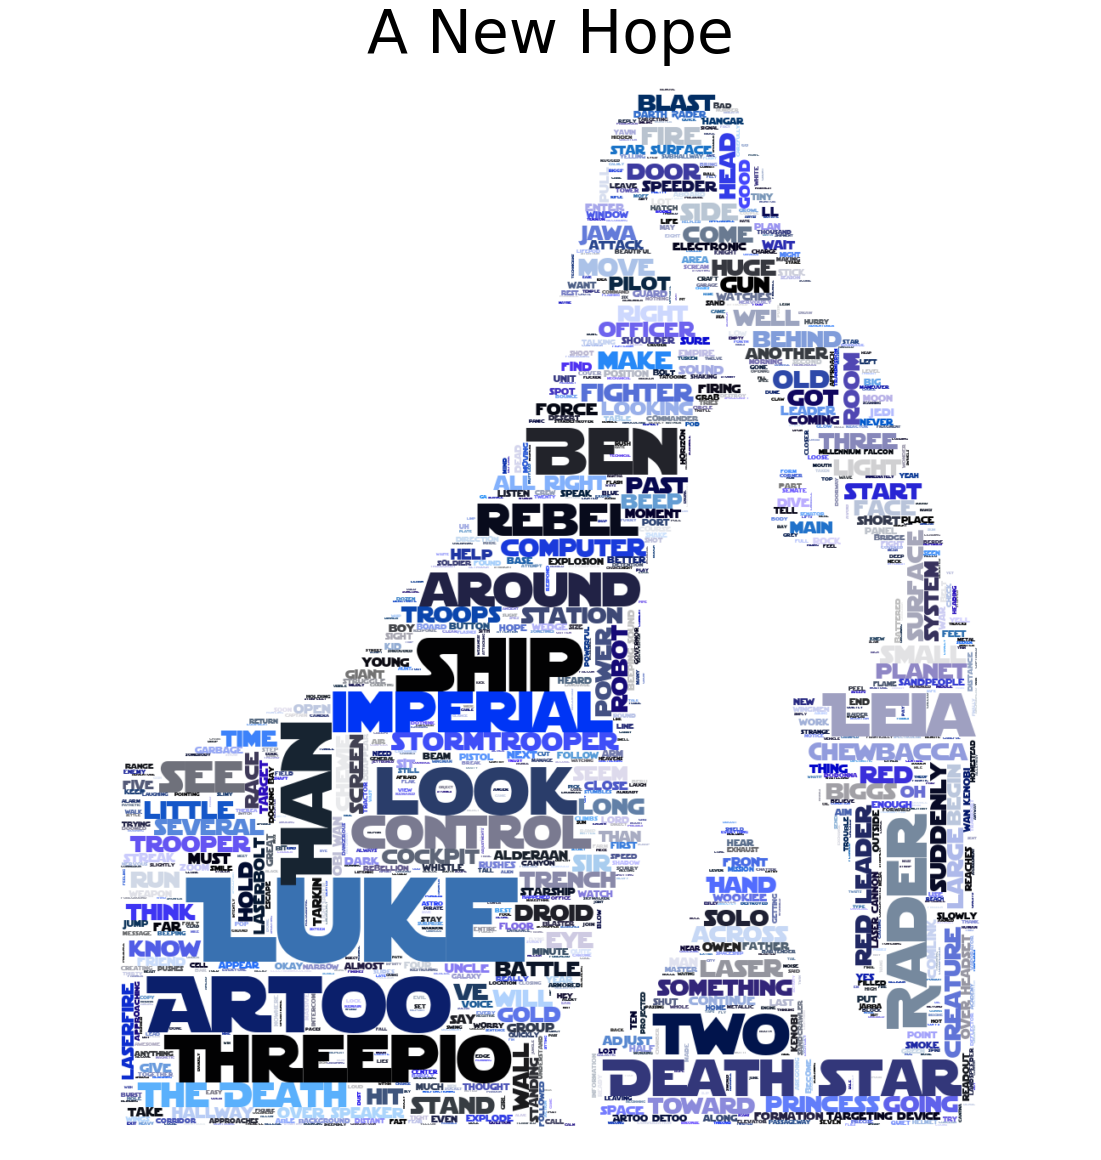

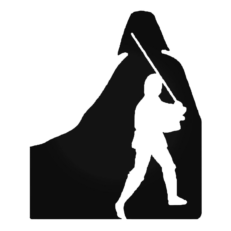

In [143]:

nebulize(ANH2, "url", 
"https://cdn11.bigcommerce.com/s-sq9zkarfah/images/stencil/1280x1280/products/74158/135826/Star-Wars-Luke-Inside-Vader-Decal-Sticker__71000.1510890365.jpg?c=2&imbypass=on",        
        140, 70000, "yes", "A New Hope", "darkblue", "STJEDISE", 20, 60 )

In [133]:
 # https://i.pinimg.com/originals/b4/2d/f1/b42df1c116fe02e58af7d0767fa8cd0e.jpg
    
    #https://i.pinimg.com/originals/a5/94/47/a594479989de48b248e58c284c5acf64.jpg

In [163]:
stopwords.add('no')
stopwords.add('see')
stopwords.add('camera')
stopwords.add('look')
stopwords.add('left')
stopwords.add('right')
stopwords.add('around')
stopwords.add('toward')
stopwords.add('over')
stopwords.add('behind')


ESBlist= ['death star', 'ben', 'luke', 'han', 'artoo', 
             'threepio', 'chewbacca', 'leia', 'ship', 'vader', 'chewie', 'star', 'walker', 'speeder']

ESB2 = Cap(ESBlist, ANH2)

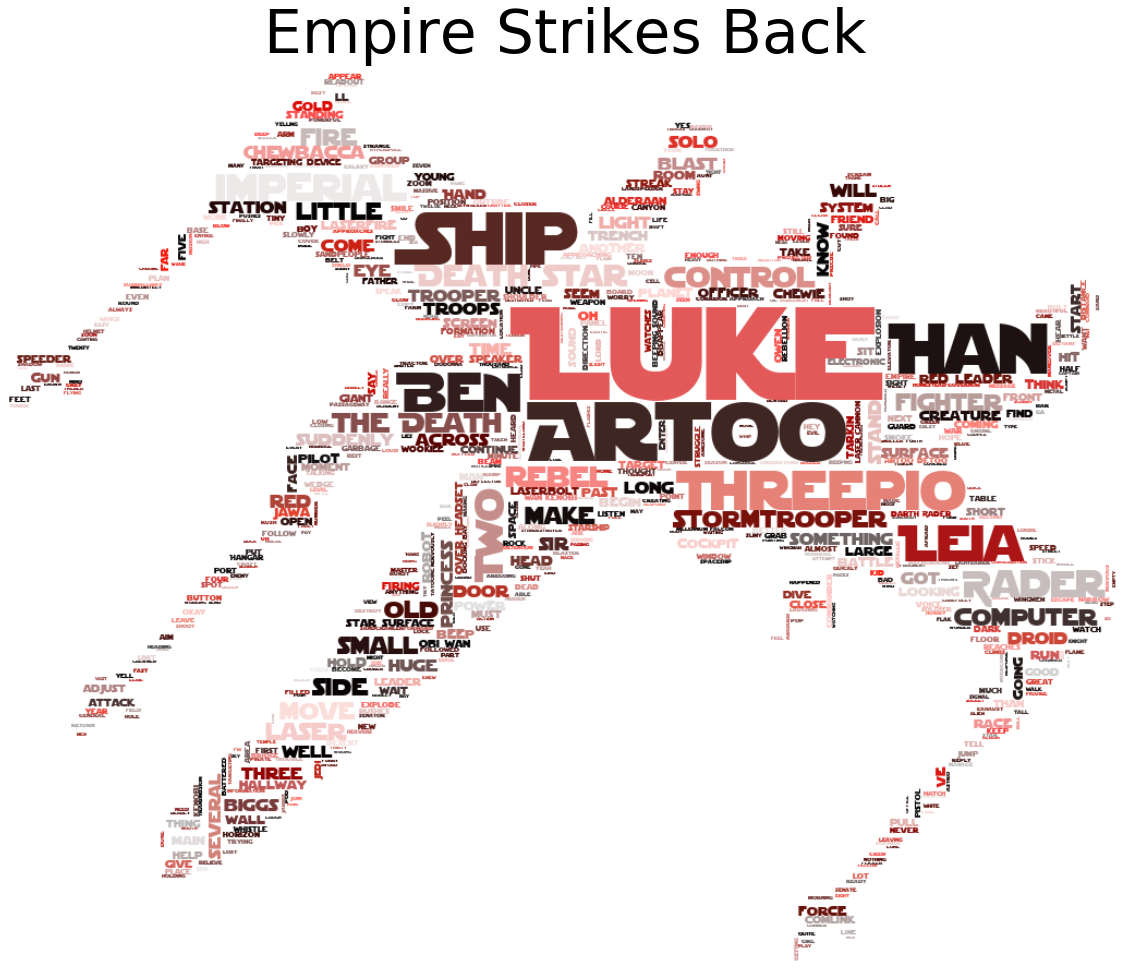

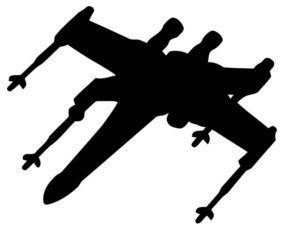

In [165]:
nebulize(ESB2, "url", 
"https://cdn.shopify.com/s/files/1/0941/8552/products/Star-Wars---X-Wing-Fighter-_Converted_1024x1024.jpg?v=1494978861",
   120, 70000, "yes", "Empire Strikes Back", "red", "STJEDISE", 20, 60 )